## Using Naive Bayes for Classification of Positive/Negative Reviews

The dataset in use comes from https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences# . We begin our analysis by inspecting Amazon reviews. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
data_path = ("/Users/jacquelynzuker/Desktop/sentiment labelled sentences/amazon_cells_labelled.txt"
            )
amazon_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
amazon_raw.columns = ['message', 'satisfaction']

Keywords are chosen for input into the Naive Bayes model. The keywords were chosen by browsing through the raw Amazon dataset and selecting "emotionally-charged" words that might be good predictors. The model was then run, and if the chosen keyword provided no benefit, it was discarded from the list. 

In [3]:
keywords = ['must have', 'excellent', 'awesome', 'recommend', 'good', 
            'great', 'happy', 'love', 'satisfied', 'best', 'works', 
            'liked', 'easy', 'quick', 'incredible', 'perfectly',
           'right', 'cool', 'joy', 'easier', 'fast', 'nice', 'family',
           'incredible', 'sweetest', 'poor', 'broke', 'doesn\'t work', 
            'not work', 'died', 'don\'t buy', 'problem', 'useless', 
            'awful', 'failed', 'terrible', 'horrible', 'the', '10',
           'cool']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_raw[str(key)] = amazon_raw.message.str.contains(
        '' + str(key) + '',
        case = False
    )


Checking the balance of the inputted dataset. 

In [4]:
amazon_raw.satisfaction.value_counts()


1    500
0    500
Name: satisfaction, dtype: int64

In [5]:
myList = [0] * 1000

for column in amazon_raw.columns[2:]:
    myColumn = amazon_raw[column]
    for index in amazon_raw.index:
        if amazon_raw[column][index] == True:
            myList[index] += 1
 

In [6]:
np.sum(myList)

997

In [7]:
amazon_raw.sum()

message         So there is no way for me to plug it in here i...
satisfaction                                                  500
must have                                                       3
excellent                                                      27
awesome                                                         5
recommend                                                      27
good                                                           75
great                                                          98
happy                                                          17
love                                                           24
satisfied                                                       4
best                                                           22
works                                                          46
liked                                                        True
easy                                                           18
quick     

One disadvantage inherent in the naive Bayes model is that it does not work well with keywords which are correlated in the reviews

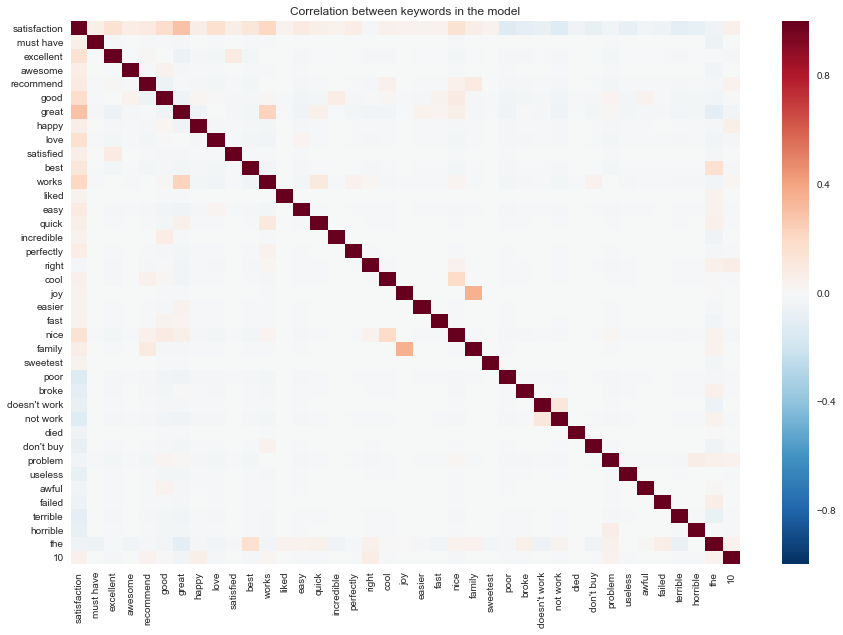

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(amazon_raw.corr())
plt.title("Correlation between keywords in the model")
plt.show()

In [11]:
data = amazon_raw[keywords]
target = amazon_raw['satisfaction']

In [12]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 213



For the Amazon dataset, this model of Naive Bayes predicts the correct outcome 82.7% of the time. Let's see how it fares on the imdb dataset

## IMDB

In [13]:
data_path = ("/Users/jacquelynzuker/Desktop/sentiment labelled sentences/imdb_labelled.txt"
            )
imdb_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
imdb_raw.columns = ['message', 'satisfaction']

amazon_raw = imdb_raw

In [14]:
#imdb_raw

This set of keywords in the model correctly predicted the outcome 464/748 = 62.0% of the time. 

## Yelp

This set of keywords in the model correctly guessed the outcome 70.1% of the time. 

In [13]:
data_path = ("/Users/jacquelynzuker/Desktop/sentiment labelled sentences/yelp_labelled.txt"
            )
yelp_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp_raw.columns = ['message', 'satisfaction']

amazon_raw = yelp_raw